Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [46]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

In [47]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [48]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [49]:
# Import block
import pandas_profiling
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Check the data types of each feature
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [52]:
# Null check.
df.isna().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1446
display_address          135
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [53]:
# Only features with nulls are text fields; the description and two forms of address.

In [54]:
# Take a look at means, mins, maxes.
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,0.525126,0.476982,0.476759,0.446486,0.424887,0.413965,0.365983,0.052541,0.268520,0.185423,0.177055,0.132821,0.138677,0.104089,0.087190,0.060686,0.055357,0.051852,0.046847,0.043929,0.042612,0.039370,0.027517,0.02620
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,0.499373,0.499475,0.499465,0.497133,0.494331,0.492547,0.481710,0.223117,0.443194,0.388644,0.381719,0.339385,0.345613,0.305379,0.282116,0.238757,0.228679,0.221730,0.211313,0.204940,0.201983,0.194476,0.163585,0.15973
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


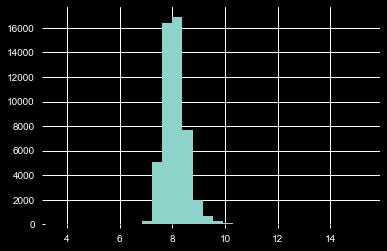

In [55]:
# Price looks like it's power-law distributed, a histogram on raw data will be ugly.
# Maybe it's log-normal?
plt.hist(np.log(df.price), bins = 30);

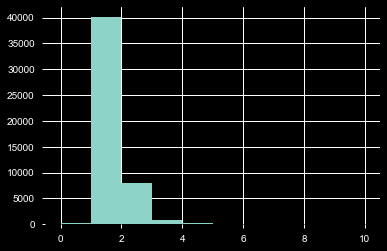

In [56]:
# We'll do the same for the other numeric, non-bool variables - bed, bath, lat, and lon.
plt.hist(df.bathrooms,bins=10);

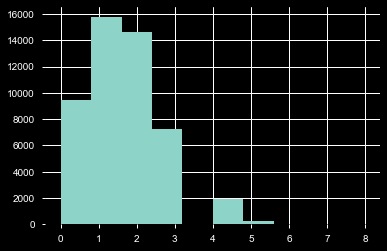

In [57]:
plt.hist(df.bedrooms);

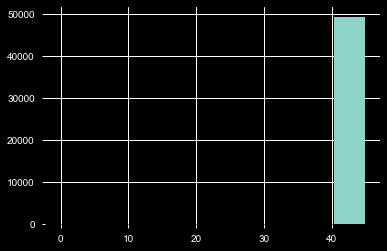

In [58]:
plt.hist(df.latitude);

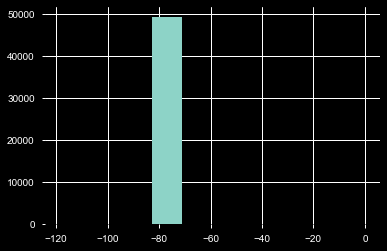

In [59]:
plt.hist(df.longitude);

In [60]:
# Latitude and longitude appear to have some zeros, which is odd.
df[df['latitude'] == 0]

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2787,5.0,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0.0,0.0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
14104,1.0,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0.0,0.0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1.0,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0.0,0.0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22471,1.0,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0.0,0.0,4395,219 E 28th,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
25860,1.0,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0.0,0.0,2950,1632 Madison Ave,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27181,1.0,2,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,0.0,0.0,3619,41-42 24th St,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
33286,4.0,3,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),0.0,0.0,16500,450 East 83rd Street,low,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
34390,1.0,1,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,0.0,0.0,3600,247 west 87,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35826,1.0,2,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,0.0,0.0,3200,118 W 109th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36448,1.0,1,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,0.0,0.0,3495,246 Mott St,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
df[df['longitude'] == 0]

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2787,5.0,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0.0,0.0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
14104,1.0,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0.0,0.0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1.0,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0.0,0.0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22471,1.0,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0.0,0.0,4395,219 E 28th,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
25860,1.0,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0.0,0.0,2950,1632 Madison Ave,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27181,1.0,2,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,0.0,0.0,3619,41-42 24th St,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
33286,4.0,3,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),0.0,0.0,16500,450 East 83rd Street,low,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
34390,1.0,1,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,0.0,0.0,3600,247 west 87,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35826,1.0,2,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,0.0,0.0,3200,118 W 109th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36448,1.0,1,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,0.0,0.0,3495,246 Mott St,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# They look normal otherwise. Let's fill them with the average.
df['latitude'] = np.where(df['latitude'] == 0, df['latitude'].mean(),df['latitude'])
df['longitude'] = np.where(df['longitude'] == 0, df['longitude'].mean(),df['longitude'])

In [63]:
# Let's see the value counts for bathrooms and bedrooms.
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

In [64]:
# Looking awfully sparse above five.
df.bedrooms.value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [65]:
# Similarly, awfully sparse above five. Looks like we can knock off anything above five.
# Let's look at price quantiles for where to cut there.
quants = np.arange(0,1,0.1)
pricequants = [df.price.quantile(q) for q in quants]
print(pricequants)

[43.0, 2000.0, 2350.0, 2600.0, 2850.0, 3150.0, 3450.0, 3800.0, 4500.0, 5651.800000000003]


In [66]:
# Let's filter using query. Prices between 10 and 90 percent, bed and bath 5 or less.
df = df.query('price >= 2000 and price <= 5651 and bedrooms <= 5 and bathrooms <= 5')
print(df.shape)
df.head()

(39613, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Mean price?
df.price.mean()

3303.011006487769

<BarContainer object of 6 artists>

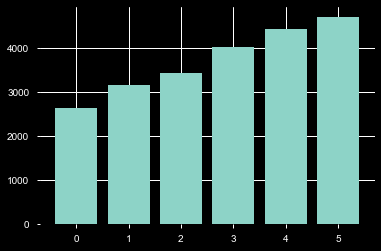

In [68]:
# Seeing how number of bedrooms relates to price
plt.bar(df.groupby('bedrooms').bedrooms.mean(),df.groupby('bedrooms').price.mean())

In [69]:
# Regression time.
model = LinearRegression()

# Assigning features and target.
feature = ['bathrooms']
target = ['price']
X = df[feature]
y = df[target]

# Fit it.
model.fit(X,y)

# Apply it.
predicted_y = model.predict(X)

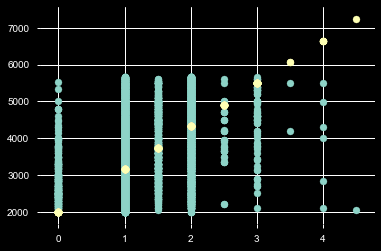

In [70]:
# Plotting actual and predicted.
plt.scatter(X,y)
plt.scatter(X,predicted_y)

In [71]:
# Define a function to predict prices.
def RestroomRevelator(bathrooms):
    predicted = model.predict([[bathrooms]])
    estimate = predicted[0][0]
    coefficient = model.coef_[0][0]
    
    result = f'${estimate:.2f} estimated rent for a New York apartment with {bathrooms:.2f} bathrooms.'
    explanation = f' Each additional bathroom is associated with a ${coefficient:.2f} increase in this model.'
    return result + explanation

In [72]:
RestroomRevelator(2)

'$4322.85 estimated rent for a New York apartment with 2.00 bathrooms. Each additional bathroom is associated with a $1164.67 increase in this model.'

In [73]:
#STRETCH GOAL
#Let's make a feature - it'll consist of the sum of all of the boolean features. Amenities, maybe?
boolfeatures = df.columns.tolist()
del boolfeatures[:10]
boolfeatures

['elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'terrace',
 'exclusive',
 'loft',
 'garden_patio',
 'wheelchair_access',
 'common_outdoor_space']

In [74]:
df['amenities'] = df[boolfeatures].sum(axis=1)

In [75]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,amenities
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [76]:
# Regression time once more. We'll use amenities, bathrooms, and bedrooms.
model2 = LinearRegression()

# Assigning features and target.
feature = ['bathrooms','bedrooms','amenities']
target = ['price']
X = df[feature]
y = df[target]

# Fit it.
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Predict the price of a 2 bed, 2 bath, 3 amenities apartment.
model2.predict([[2,2,3]])

array([[3987.08130868]])

In [82]:
# How about 2 bed, 1 bath, 2 amenities?
model2.predict([[1,2,2]])

array([[3241.44039342]])